# Project of Advanced Programming

In the following document you will find all the codes used for this project and their respective outputs.

# Setup functions

In [1]:
# Install necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import deque
import heapq
import math

class Cell:
    def __init__(self, x=0, y=0, dist=0, parent=None, alive_bishop=True, alive_rook=True):
        self.x = x
        self.y = y
        self.dist = dist
        self.parent = parent
        self.alive_bishop = alive_bishop
        self.alive_rook = alive_rook
    
    def __lt__(self, other):
        return self.dist < other.dist

def Chessboard(n):
    base_row = np.tile([1, 0], (n + 1) // 2)[:n]
    board = np.tile(base_row, (n, 1))
    for i in range(n):
        if i % 2 != 0:
            board[i] = np.roll(board[i], 1)
    return board

def plot_chessboard(ax, board):
    ax.imshow(board, cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

def plot_piece(ax, position, color, label):
    ax.add_patch(patches.Circle((position[1], position[0]), 0.4, color=color, fill=True))
    ax.text(position[1], position[0], label, color='white', fontsize=12, ha='center', va='center')

def plot_square(ax, position, color, linewidth):
    ax.add_patch(patches.Rectangle((position[1] - 0.5, position[0] - 0.5), 1, 1, edgecolor=color, facecolor='none', lw=linewidth))

def plot_threatened_squares(ax, n, bishopRow, bishopCol, rookRow, rookCol):
    if bishopRow < n and bishopCol < n:
        for i in range(n):
            for j in range(n):
                if abs(bishopRow - i) == abs(bishopCol - j) and (i != bishopRow or j != bishopCol):
                    ax.add_patch(patches.Circle((j, i), 0.2, color='purple', fill=True, alpha=0.5))

    if rookRow < n and rookCol < n:
        for i in range(n):
            if i != rookRow:
                ax.add_patch(patches.Circle((rookCol, i), 0.2, color='orange', fill=True, alpha=0.5))
            if i != rookCol:
                ax.add_patch(patches.Circle((i, rookRow), 0.2, color='orange', fill=True, alpha=0.5))    
    
def is_inside(x, y, n):
    return 0 <= x < n and 0 <= y < n

def isBishopAlive(n, bishopRow, bishopCol):
    if bishopRow < n and bishopCol < n:
        return True
    else:
        return False
    
def isRookAlive(n, rookRow, rookCol):
    if rookRow < n and rookCol < n:
        return True
    else:
        return False
    
def draw_path(ax, path):
    for (i, j) in path:
        ax.add_patch(patches.Circle((j, i), 0.3, color='red', fill=True, alpha=0.7))
    for k in range(len(path) - 1):
        (i1, j1), (i2, j2) = path[k], path[k + 1]
        ax.plot([j1, j2], [i1, i2], color='red', linewidth=2)

# BFS

Minimum steps required: 9
Coordinate of the path: [(0, 0), (2, 1), (1, 3), (3, 2), (5, 3), (6, 5), (7, 7), (8, 5), (6, 4), (5, 2)]


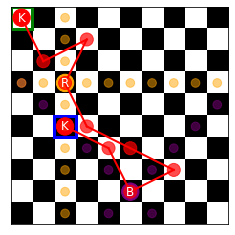

In [2]:
def moves(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol):
    if startRow == endRow and startCol == endCol:  # Caso banale
        return 0, [(startRow, startCol)]
    
    moves = ((2,1), (1,2), (-1,2), (-2,1), (-2,-1), (-1,-2), (1,-2), (2,-1))
    queue = deque()
    queue.append([startRow, startCol, True, True, 0, [(startRow, startCol)]])  # Includere che il vescovo è vivo
    visited = set([(startRow, startCol, True, True)])  # Impostare come visitato
    
    while queue:
        i, j, alive_bishop, alive_rook, steps, path = queue.popleft()        
        for di, dj in moves:
            cr = i + di
            cc = j + dj
            
            # Update life status only for the current path
            stillalive_bishop = alive_bishop and (cr != bishopRow or cc != bishopCol)
            stillalive_rook = alive_rook and (cr != rookRow or cc != rookCol)
            
            if 0 <= cr < n and 0 <= cc < n and (cr, cc, stillalive_bishop, stillalive_rook) not in visited and (
                    not stillalive_bishop or abs(cr - bishopRow) != abs(cc - bishopCol)) and (
                    not stillalive_rook or (cr != rookRow and cc != rookCol)):
                
                if cr == endRow and cc == endCol:
                    return steps + 1, path + [(cr, cc)]
                
                pathnew = path + [(cr, cc)]
                queue.append((cr, cc, stillalive_bishop, stillalive_rook, steps + 1, pathnew))
                visited.add((cr, cc, stillalive_bishop, stillalive_rook))    
    return -1, None

# Configuration and visualization of the board and pieces
n = 10
startRow, startCol = 0, 0
endRow, endCol = 5, 2
bishopRow, bishopCol = 8, 5
rookRow, rookCol = 3, 2

board = Chessboard(n)
fig, ax = plt.subplots()
plot_chessboard(ax, board)
plot_square(ax, (startRow, startCol), 'green', 3)
plot_square(ax, (endRow, endCol), 'blue', 3)
plot_piece(ax, (startRow, startCol), 'red', 'K')
plot_piece(ax, (bishopRow, bishopCol), 'purple', 'B')
plot_piece(ax, (rookRow, rookCol), 'orange', 'R')
plot_piece(ax, (endRow, endCol), 'red', 'K')
plot_threatened_squares(ax, n, bishopRow, bishopCol, rookRow, rookCol)


result = moves(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol)
if result[0] != -1:
    steps, path = result
    draw_path(ax, path)
    print(f"Minimum steps required: {steps}")
    print("Coordinate of the path:", path)
else:
    print("No path found to reach the target.")

plt.show()

# DFS

Minimum steps required: 13
Coordinate of the path: [(0, 0), (2, 1), (4, 0), (3, 2), (5, 1), (7, 0), (6, 2), (8, 1), (7, 3), (8, 5), (9, 3), (8, 1), (6, 0), (5, 2)]


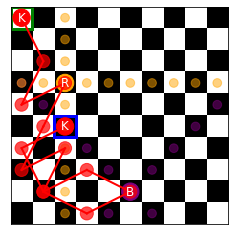

In [3]:
def dfs(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol):
    if startRow == endRow and startCol == endCol:
        return 0, [(startRow, startCol)]
    
    moves = ((2,1), (1,2), (-1,2), (-2,1), (-2,-1), (-1,-2), (1,-2), (2,-1))
    stack = [(startRow, startCol, True, True, 0, [(startRow, startCol)])]  # Using a stack instead of a queue
    visited = set([(startRow, startCol, True, True)])
    
    while stack:
        i, j, alive_bishop, alive_rook, steps, path = stack.pop()  # Using pop for DFS        
        for di, dj in moves:
            cr = i + di
            cc = j + dj
            
            # Update life status only for the current path
            stillalive_bishop = alive_bishop and (cr != bishopRow or cc != bishopCol)
            stillalive_rook = alive_rook and (cr != rookRow or cc != rookCol)
            
            if 0 <= cr < n and 0 <= cc < n and (cr, cc, stillalive_bishop, stillalive_rook) not in visited and (
                    not stillalive_bishop or abs(cr - bishopRow) != abs(cc - bishopCol)) and (
                    not stillalive_rook or (cr != rookRow and cc != rookCol)):
                
                if cr == endRow and cc == endCol:
                    return steps + 1, path + [(cr, cc)]
                
                pathnew = path + [(cr, cc)]
                stack.append((cr, cc, stillalive_bishop, stillalive_rook, steps + 1, pathnew))
                visited.add((cr, cc, stillalive_bishop, stillalive_rook))    
    return -1, None

# Configuration and visualization of the board and pieces
n = 10
startRow, startCol = 0, 0
endRow, endCol = 5, 2
bishopRow, bishopCol = 8, 5
rookRow, rookCol = 3, 2

board = Chessboard(n)
fig, ax = plt.subplots()
plot_chessboard(ax, board)
plot_square(ax, (startRow, startCol), 'green', 3)
plot_square(ax, (endRow, endCol), 'blue', 3)
plot_piece(ax, (startRow, startCol), 'red', 'K')
plot_piece(ax, (bishopRow, bishopCol), 'purple', 'B')
plot_piece(ax, (rookRow, rookCol), 'orange', 'R')
plot_piece(ax, (endRow, endCol), 'red', 'K')
plot_threatened_squares(ax, n, bishopRow, bishopCol, rookRow, rookCol)


result = dfs(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol)
if result[0] != -1:
    steps, path = result
    draw_path(ax, path)
    print(f"Minimum steps required: {steps}")
    print("Coordinate of the path:", path)
else:
    print("No path found to reach the target.")

plt.show()

# A*

Minimum steps required: 9
Coordinate of the path: [(0, 0), (2, 1), (4, 0), (3, 2), (5, 1), (4, 3), (6, 4), (8, 5), (6, 4), (5, 2)]


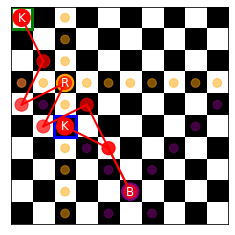

In [4]:
def heuristic(cell, goal):
    return abs(cell.x - goal[0]) + abs(cell.y - goal[1])

def a_star(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol):
    if startRow == endRow and startCol == endCol:
        return 0, [(startRow, startCol)]

    start = Cell(startRow, startCol, 0, None, True, True)
    end = (endRow, endCol)
    open_set = []
    heapq.heappush(open_set, (heuristic(start, end), start))
    visited = set([(startRow, startCol, True, True)])
    
    moves = ((2, 1), (1, 2), (-1, 2), (-2, 1), (-2, -1), (-1, -2), (1, -2), (2, -1))

    while open_set:
        _, current = heapq.heappop(open_set)
        i, j = current.x, current.y
        alive_bishop, alive_rook = current.alive_bishop, current.alive_rook
        steps = current.dist
        
        if (i, j) == end:
            path = []
            temp = current
            while temp:
                path.append((temp.x, temp.y))
                temp = temp.parent
            return steps, path[::-1]

        for di, dj in moves:
            cr = i + di
            cc = j + dj

            stillalive_bishop = alive_bishop and (cr != bishopRow or cc != bishopCol)
            stillalive_rook = alive_rook and (cr != rookRow or cc != rookCol)
            
            if 0 <= cr < n and 0 <= cc < n and (cr, cc, stillalive_bishop, stillalive_rook) not in visited and (
                    not stillalive_bishop or abs(cr - bishopRow) != abs(cc - bishopCol)) and (
                    not stillalive_rook or (cr != rookRow and cc != rookCol)):
                
                new_cell = Cell(cr, cc, steps + 1, current, stillalive_bishop, stillalive_rook)
                heapq.heappush(open_set, (new_cell.dist + heuristic(new_cell, end), new_cell))
                visited.add((cr, cc, stillalive_bishop, stillalive_rook))
    return -1, None

# Configuration and visualization of the board and pieces
n = 10
startRow, startCol = 0, 0
endRow, endCol = 5, 2
bishopRow, bishopCol = 8, 5
rookRow, rookCol = 3, 2

board = Chessboard(n)
fig, ax = plt.subplots()
plot_chessboard(ax, board)
plot_square(ax, (startRow, startCol), 'green', 3)
plot_square(ax, (endRow, endCol), 'blue', 3)
plot_piece(ax, (startRow, startCol), 'red', 'K')
plot_piece(ax, (bishopRow, bishopCol), 'purple', 'B')
plot_piece(ax, (rookRow, rookCol), 'orange', 'R')
plot_piece(ax, (endRow, endCol), 'red', 'K')
plot_threatened_squares(ax, n, bishopRow, bishopCol, rookRow, rookCol)

result = a_star(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol)
if result[0] != -1:
    steps, path = result
    draw_path(ax, path)
    print(f"Minimum steps required: {steps}")
    print("Coordinate of the path:", path)
else:
    print("No path found to reach the target.")

plt.show()

# Bidirectional Search

Minimum steps required: 14
Coordinate of the path: [(0, 0), (2, 1), (1, 3), (3, 2), (5, 3), (6, 5), (7, 7), (8, 5), (8, 5), (7, 7), (6, 5), (5, 3), (3, 2), (4, 4), (5, 2)]


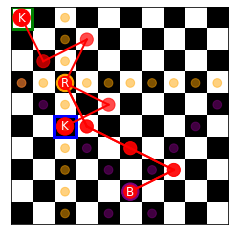

In [5]:
def bidirectional_search(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol):
    if startRow == endRow and startCol == endCol:
        return 0, [(startRow, startCol)]

    def get_neighbors(i, j, alive_bishop, alive_rook):
        moves = [(2, 1), (1, 2), (-2, 1), (-1, 2), (-2, -1), (-1, -2), (2, -1), (1, -2)]
        neighbors = []
        for di, dj in moves:
            cr = i + di
            cc = j + dj
            stillalive_bishop = alive_bishop and (cr != bishopRow or cc != bishopCol)
            stillalive_rook = alive_rook and (cr != rookRow or cc != rookCol)
            if 0 <= cr < n and 0 <= cc < n and (
                not stillalive_bishop or abs(cr - bishopRow) != abs(cc - bishopCol)) and (
                not stillalive_rook or cr != rookRow and cc != rookCol):
                neighbors.append((cr, cc, stillalive_bishop, stillalive_rook))
        return neighbors

    def bfs(queue, visited, other_visited, forward=True):
        i, j, alive_bishop, alive_rook, steps, path = queue.popleft()
        for neighbor in get_neighbors(i, j, alive_bishop, alive_rook):
            if neighbor not in visited:
                visited[neighbor] = path + [neighbor[:2]]
                if neighbor in other_visited:
                    other_path = other_visited[neighbor]
                    combined_path = path + [neighbor[:2]] + other_path[::-1] if forward else other_path + [neighbor[:2]] + path[::-1]
                    if check_obstacles(combined_path, bishopRow, bishopCol, rookRow, rookCol, endRow, endCol):
                        return True, combined_path
                queue.append((*neighbor, steps + 1, path + [neighbor[:2]]))
        return False, None

    start_queue = deque([(startRow, startCol, True, True, 0, [(startRow, startCol)])])
    end_queue = deque([(endRow, endCol, True, True, 0, [(endRow, endCol)])])
    start_visited = {(startRow, startCol, True, True): [(startRow, startCol)]}
    end_visited = {(endRow, endCol, True, True): [(endRow, endCol)]}

    while start_queue and end_queue:
        found, path = bfs(start_queue, start_visited, end_visited, forward=True)
        if found:
            return len(path) - 1, path
        found, path = bfs(end_queue, end_visited, start_visited, forward=False)
        if found:
            return len(path) - 1, path

    return -1, None

def check_obstacles(path, bishopRow, bishopCol, rookRow, rookCol, endRow, endCol):
    bishop_alive = True
    rook_alive = True
    for cr, cc in path:
        if bishop_alive and (cr == bishopRow and cc == bishopCol):
            bishop_alive = False
        if rook_alive and (cr == rookRow and cc == rookCol):
            rook_alive = False
    # Check whether it is necessary to eat obstacles to reach the goal
    need_to_eat_bishop = any(abs(cr - bishopRow) == abs(cc - bishopCol) for cr, cc in path) and bishop_alive
    need_to_eat_rook = any((cr == rookRow or cc == rookCol) for cr, cc in path) and rook_alive
    # Consider obstacles only if they are alive and the goal is achieved
    return (not need_to_eat_bishop or not bishop_alive) and (not need_to_eat_rook or not rook_alive)

# Configuration and visualization of the board and pieces
n = 10
startRow, startCol = 0, 0
endRow, endCol = 5, 2
bishopRow, bishopCol = 8, 5
rookRow, rookCol = 3, 2

board = Chessboard(n)
fig, ax = plt.subplots()
plot_chessboard(ax, board)
plot_square(ax, (startRow, startCol), 'green', 3)
plot_square(ax, (endRow, endCol), 'blue', 3)
plot_piece(ax, (startRow, startCol), 'red', 'K')
plot_piece(ax, (bishopRow, bishopCol), 'purple', 'B')
plot_piece(ax, (rookRow, rookCol), 'orange', 'R')
plot_piece(ax, (endRow, endCol), 'red', 'K')
plot_threatened_squares(ax, n, bishopRow, bishopCol, rookRow, rookCol)


result = bidirectional_search(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol)
if result[0] != -1:
    steps, path = result
    draw_path(ax, path)
    print(f"Minimum steps required: {steps}")
    print("Coordinate of the path:", path)
else:
    print("No path found to reach the target.")

plt.show()